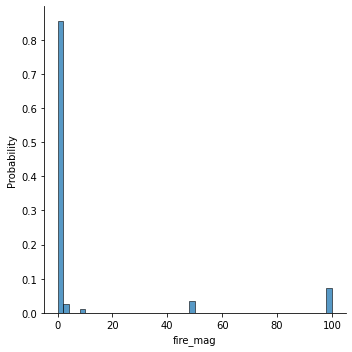

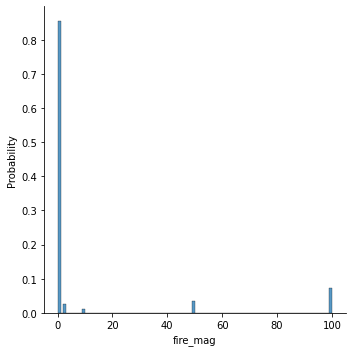

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('../data/FW_Veg_Rem_Combined.csv')

sns.displot(data=df, x='fire_mag',  bins=50, stat='probability')
plt.show()

sns.displot(data=df, x='fire_mag',  bins=100, stat='probability')
plt.show()

In [17]:
#calculation of number of nans and non-nans

nans = df.loc[df.fire_mag.isna()]
print(f'Number of NANs is: {nans.size}')

non_nans = df.loc[~df.fire_mag.isna()]
print(f'number of values is: {non_nans.size}')

Number of NANs is: 0
number of values is: 2380781


In [18]:
# we cannot show it because of the really bif amounts of data

#sns.histplot(df, x="fire_size", y="fire_mag")
#sns.histplot(df, x="fire_size", y="fire_mag", hue='fire_size_class')
#plt.show()

#therefore we do it for sampled data

fire_size_total = df['fire_mag'].sum()
sample_size = int(non_nans.size * 0.1)

df['cumulative_sum_fm'] = df['fire_mag'].cumsum()
interval_width = int(fire_size_total/sample_size)

num = interval_width #can be a random number also as in the example

sampled_series = np.arange(num, fire_size_total, interval_width)
cum_array = np.asarray(df['cumulative_sum_fm'])
selected_samples = np.zeros(sample_size, dtype='int32')
idx = np.searchsorted(cum_array,sampled_series) #the heart of code
result = cum_array[idx-1] 
ndf = df[df.cumulative_sum_fm.isin(result)]
del ndf['cumulative_sum_fm'] #so that new file doesn't have cum_sum column
print(ndf.size)

655578


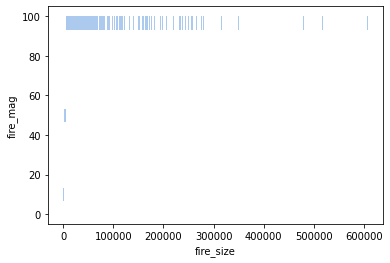

In [19]:
sns.histplot(ndf, x="fire_size", y="fire_mag")
plt.show()

In [20]:
mean = df.fire_mag.mean()
median = df.fire_mag.median()
stddev = math.sqrt(df.fire_mag.var())
max = df.fire_mag.max()
min = df.fire_mag.min()
print(f'Mean: {mean}; median: {median}; stddev: {stddev}; min: {min}; max: {max}')

Mean: 9.414365958061662; median: 0.1; stddev: 26.82036325540434; min: 0.1; max: 100.0


In [22]:
mean = ndf.fire_mag.mean()
median = ndf.fire_mag.median()
stddev = math.sqrt(ndf.fire_mag.var())
max = ndf.fire_mag.max()
min = ndf.fire_mag.min()
print(f'Mean: {mean}; median: {median}; stddev: {stddev}; min: {min}; max: {max}')

Mean: 30.830080020989108; median: 1.0; stddev: 42.748693009699664; min: 0.1; max: 100.0


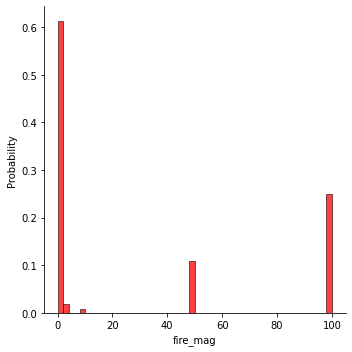

In [25]:
sns.displot(data=ndf, x='fire_mag',  bins=50, stat='probability', color='red', label='sampled')
plt.show()